https://www.kaggle.com/code/teddylee777/eda-lightgbm-pycaret

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('./csv'): #경로 내에 있는 파일을 하나하나 돌아다니며 불러와
    for filename in filenames: #근데 filename만 불러와야돼 (여기서는 CSV만)
        print(os.path.join(dirname, filename)) #그리고 경로와 파일이름을 병합하여 새 경로 만들어줘

./csv\adult_data.csv
./csv\adult_test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os

warnings.filterwarnings('ignore')

SEED = 1234
FIG_SIZE = (10, 7)

In [3]:
DIR = './csv'

In [4]:
train = pd.read_csv(os.path.join(DIR, 'adult_data.csv'))
test = pd.read_csv(os.path.join(DIR, 'adult_test.csv'))

In [5]:
print(train.shape, test.shape)

(32560, 15) (16280, 15)


In [6]:
train.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
test.head()

,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0.1,40,United-States,<=50K.
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import os

warnings.filterwarnings('ignore')
train = pd.read_csv("./csv/adult_data.csv")
train.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                 'education_num', 'marital_status', 'occupation',
                 'relationship', 'race' ,'sex' ,'capital_gain', 
                 'capital_loss', 'hours_per_week', 'native_country','income']
train.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [9]:
test =  pd.read_csv("./csv/adult_test.csv")
test.columns =  ['age', 'workclass', 'fnlwgt', 'education', 
                 'education_num', 'marital_status', 'occupation',
                 'relationship', 'race' ,'sex' ,'capital_gain', 
                 'capital_loss', 'hours_per_week', 'native_country','income']
test.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [10]:
train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [11]:
train["workclass"].unique()# 공백이있음 .unique는 어떤값들이 있는지 알아보는 함수

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
train["workclass"].map(lambda x : x.lstrip()).unique()#좌측 공백제거

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [13]:
train[["workclass","education","marital_status","occupation",
       "relationship","race","sex","native_country"]] = \
train[["workclass","education","marital_status","occupation",
       "relationship","race","sex","native_country"]].applymap(lambda x : x.lstrip())

In [14]:
test[["workclass","education","marital_status","occupation",
       "relationship","race","sex","native_country"]] = \
test[["workclass","education","marital_status","occupation",
       "relationship","race","sex","native_country"]].applymap(lambda x : x.lstrip())

In [15]:
train.workclass.unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
test.workclass.unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
train.income.unique()

array([' <=50K', ' >50K'], dtype=object)

In [18]:
train.income = train.income.replace([' <=50K', ' >50K'],['<=50K', '>50K'])
test.income = test.income.replace([' <=50K', ' >50K'],['<=50K', '>50K']) #인컴 값바꿔주기

In [19]:
train = train.copy() #전처리한 데이터 copy 하기
test = test.copy()

In [20]:
print(train.shape, test.shape)

(32560, 15) (16280, 15)


In [21]:
train.isnull().sum() #결측지 없음 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [22]:
test.isnull().sum()#결측지 없음 

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       16280 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education_num   16280 non-null  int64 
 5   marital_status  16280 non-null  object
 6   occupation      16280 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital_gain    16280 non-null  int64 
 11  capital_loss    16280 non-null  int64 
 12  hours_per_week  16280 non-null  int64 
 13  native_country  16280 non-null  object
 14  income          16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [25]:
train['income'].value_counts()

<=50K    24719
>50K      7841
Name: income, dtype: int64

In [26]:
train.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [27]:
train.income = train.income.map(lambda x: 1 if x == '>50K' else 0) #범주형 0 1로 교체
train.income.value_counts()

0    24719
1     7841
Name: income, dtype: int64

In [28]:
test.income.unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [29]:
test.income = test.income.map(lambda x: 1 if x == ' >50K.' else 0)
test.income.value_counts()

0    12434
1     3846
Name: income, dtype: int64

In [30]:
all_data = pd.concat([train, test], sort=False)

In [31]:
all_data['workclass'].value_counts()

Private             33905
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1980
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

<AxesSubplot:xlabel='workclass'>

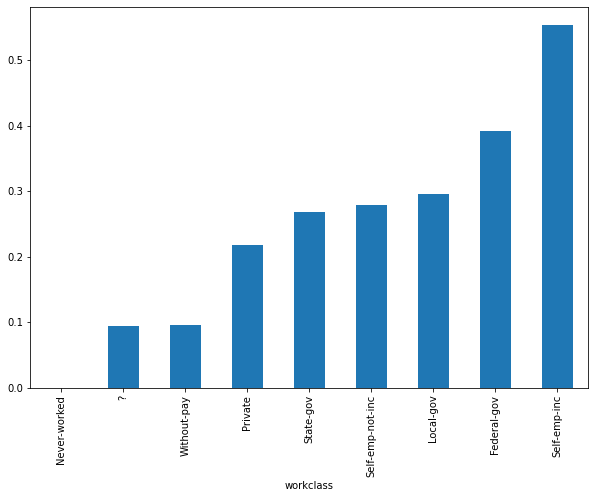

In [32]:
all_data.groupby('workclass')['income'].mean().sort_values().plot(kind='bar', figsize=FIG_SIZE)#workclass에 대해서 income 값이 어떤지 본다

workclass_other = ['Without-pay', 'Never-worked']
all_data['workclass'] = all_data['workclass'].apply(lambda x: 'Other' if x in workclass_other else x) withou-pay와 neverwork가 둘다 0이였으면 합침
all_data['workclass'].value_counts()

<AxesSubplot:xlabel='age', ylabel='Density'>

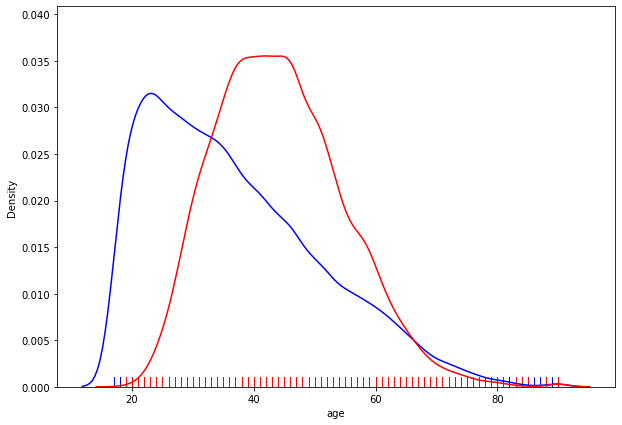

In [33]:
df1 = all_data.loc[all_data['income'] == 0, 'age'] #income별 나이분포 확인
df2 = all_data.loc[all_data['income'] == 1, 'age']

plt.figure(figsize=FIG_SIZE)
sns.distplot(df1, kde=True, rug=True, hist=False, color='blue') #kde: 가우스 커널 밀도 추정값을 플로팅할지 여부:bool, rug:지지축에 러그플롯을 그릴지 여부입니다:bool, hist:정규화된 histogram을 그릴지 여부
sns.distplot(df2, kde=True, rug=True, hist=False, color='red') # https://darkpgmr.tistory.com/147 커널 밀도 함수

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

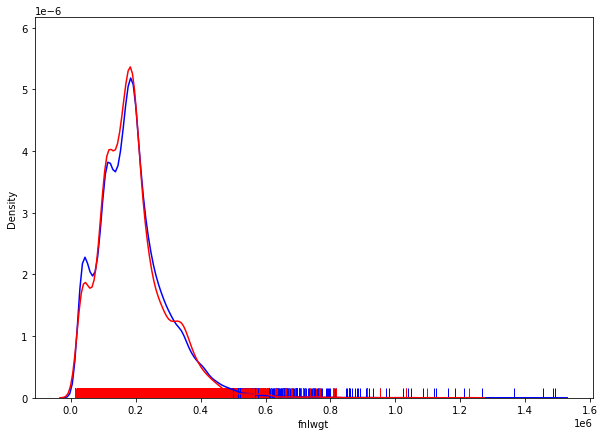

In [34]:
df1 = all_data.loc[all_data['income'] == 0, 'fnlwgt']
df2 = all_data.loc[all_data['income'] == 1, 'fnlwgt'] #사람의 대표성을 나타나는 가중치와 비교

plt.figure(figsize=FIG_SIZE)
sns.distplot(df1, kde=True, rug=True, hist=False, color='blue')
sns.distplot(df2, kde=True, rug=True, hist=False, color='red') #차이가 거의없다 feature제거도 생각해볼만하다.

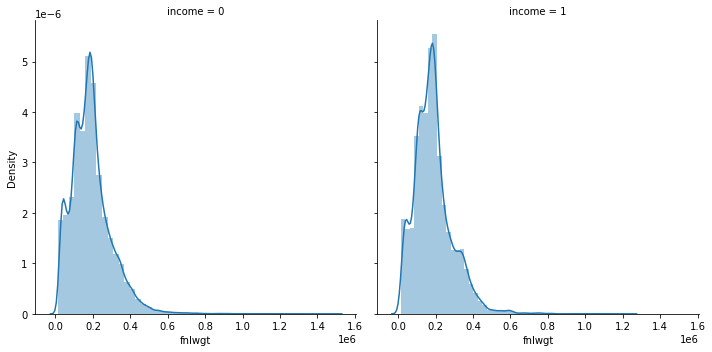

In [35]:
g = sns.FacetGrid(all_data, col="income", height=5)
g.map(sns.distplot, 'fnlwgt')

In [36]:
all_data['fnlwgt_log'] = np.log(all_data['fnlwgt'])#로그 취해서 정규화 오른쪽 꼬리가 길다!

In [37]:
all_data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8024
Masters          2657
Assoc-voc        2061
11th             1811
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [38]:
all_data['education_num'].value_counts() #둘의 value count값이 동일함. 하나 버리자

9     15784
10    10878
13     8024
14     2657
11     2061
7      1811
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: education_num, dtype: int64

In [39]:
all_data.loc[all_data['education'] == 'Preschool', 'income']=0 #값이 하나만 1이여서 0으로 만들어주었다. 
all_data.loc[all_data['education'] == 'Preschool', 'income'].sum()

0

In [40]:
all_data.groupby(['education'])['income'].agg(['mean', 'count']).sort_values('mean') #education은 income과 연관성이 있어보임
#agg는 .aggregate() 내가 함수를 만듬. 

,mean,count
education,,
Preschool,0.000000,83
1st-4th,0.032389,247
11th,0.050801,1811
5th-6th,0.053045,509
9th,0.054233,756
10th,0.062635,1389
7th-8th,0.064921,955
12th,0.073059,657
HS-grad,0.158578,15784


In [41]:
education_map = {
    'Preschool': 'level_0', 
    '1st-4th': 'level_1', 
    '5th-6th': 'level_1', 
    '7th-8th': 'level_2', 
    '9th': 'level_2', 
    '10th': 'level_3', 
    '11th': 'level_3', 
    '12th': 'level_3', 
    'HS-grad': 'level_4', 
    'Some-college': 'level_5', 
    'Assoc-acdm': 'level_6', 
    'Assoc-voc': 'level_6', 
    'Bachelors': 'level_7', 
    'Masters': 'level_8', 
    'Prof-school': 'level_9', 
    'Doctorate': 'level_9',
}

In [42]:
all_data['education'] = all_data['education'].map(education_map)#값들을 변경

In [43]:
all_data['education'].value_counts()

level_4    15784
level_5    10878
level_7     8024
level_3     3857
level_6     3662
level_8     2657
level_2     1711
level_9     1428
level_1      756
level_0       83
Name: education, dtype: int64

<AxesSubplot:xlabel='education'>

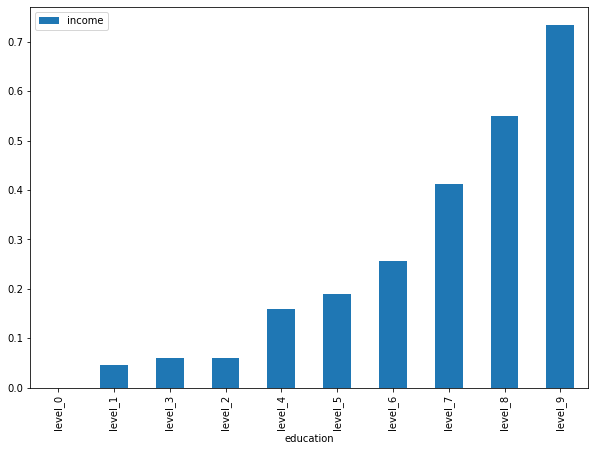

In [44]:
all_data.pivot_table(index='education', values=['income']).sort_values('income').plot(kind='bar', figsize=FIG_SIZE)
#index=행위치에 들어갈 열, value=데이터로 들어갈열 df.plot이라고 생각하면 될듯? kind=바형
#preschool의 income은 0

In [45]:
all_data = all_data.drop('education_num', 1) #educatuon_num을 drop

In [46]:
all_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'fnlwgt_log'],
      dtype='object')

In [47]:
all_data['marital_status'].value_counts()

Married-civ-spouse       22379
Never-married            16115
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital_status, dtype: int64

In [48]:
all_data.pivot_table(index='marital_status', values='income', aggfunc=['mean', 'count']).sort_values(('mean','income'))#aggfunc=데이터 집계함수

,mean,count
,income,income
marital_status,,
Never-married,0.045486,16115
Separated,0.064052,1530
Widowed,0.084321,1518
Married-spouse-absent,0.092357,628
Divorced,0.101161,6633
Married-AF-spouse,0.378378,37
Married-civ-spouse,0.446133,22379


In [49]:
all_data.pivot_table(index='marital_status', values='income', aggfunc=['mean', 'count']).sort_values(('count','income'))

,mean,count
,income,income
marital_status,,
Married-AF-spouse,0.378378,37
Married-spouse-absent,0.092357,628
Widowed,0.084321,1518
Separated,0.064052,1530
Divorced,0.101161,6633
Never-married,0.045486,16115
Married-civ-spouse,0.446133,22379


In [50]:
all_data.loc[all_data['marital_status'] == 'Married-AF-spouse', 'marital_status'] = 'Married-civ-spouse' 
#Married-AF-spouse를  Married-civ-spouse로 변경

In [51]:
all_data['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5610
Sales                5504
Other-service        4923
Machine-op-inspct    3021
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

<AxesSubplot:xlabel='occupation'>

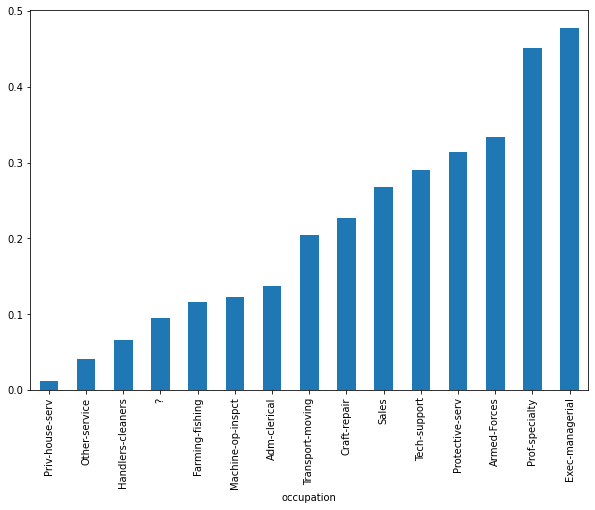

In [52]:
all_data.groupby('occupation')['income'].mean().sort_values().plot(kind='bar', figsize=FIG_SIZE)

all_data.loc[train['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'income'].value_counts()
all_data.loc[all_data['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'occupation'] = 'Priv-house-serv'
#occupation에서 armed-Forces와 priv-house-serv가 거의비슷할때, armed-force가 0값이 나오면, 과적합 줄이기위해 둘이 합침.

In [53]:
all_data.loc[all_data['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'occupation']

441         Armed-Forces
535      Priv-house-serv
621      Priv-house-serv
928      Priv-house-serv
1037     Priv-house-serv
              ...       
15595    Priv-house-serv
15758    Priv-house-serv
15933    Priv-house-serv
16044    Priv-house-serv
16265    Priv-house-serv
Name: occupation, Length: 257, dtype: object

In [54]:
all_data['relationship'].value_counts()

Husband           19716
Not-in-family     12582
Own-child          7580
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

<AxesSubplot:xlabel='relationship'>

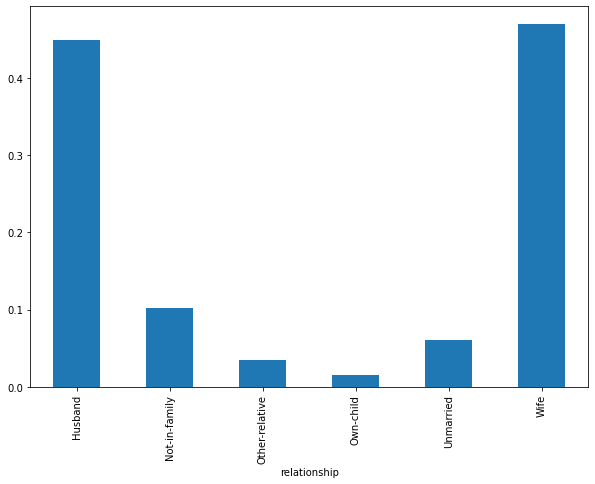

In [55]:
all_data.groupby('relationship')['income'].mean().plot(kind='bar', figsize=FIG_SIZE)#관련도 찾지 못해 방치

In [56]:
all_data['race'].value_counts()

White                 41761
Black                  4684
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

<AxesSubplot:xlabel='race'>

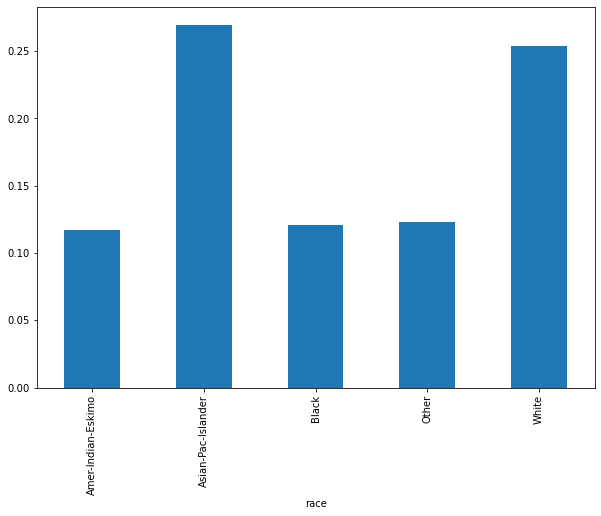

In [57]:
all_data.groupby('race')['income'].mean().plot(kind='bar', figsize=FIG_SIZE)#얘도 방치 

In [58]:
all_data['sex'].value_counts()

Male      32648
Female    16192
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex'>

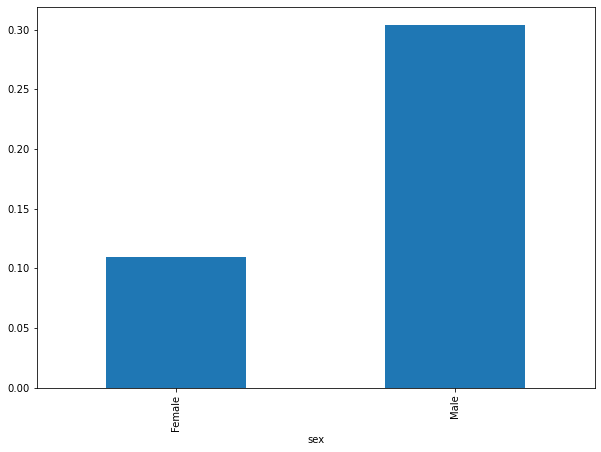

In [59]:
all_data.groupby('sex')['income'].mean().plot(kind='bar', figsize=FIG_SIZE) #특이사항 x

<AxesSubplot:xlabel='capital_gain', ylabel='Density'>

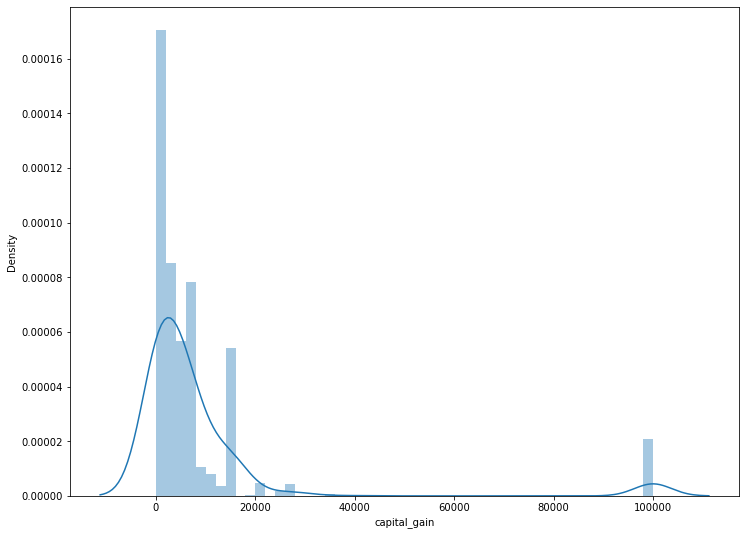

In [60]:
plt.figure(figsize=(12, 9))
sns.distplot(all_data.loc[train['capital_gain'] > 0, 'capital_gain'])# capital gain >0 인것을 displot 자체가 그래프,hist 같이 있다.

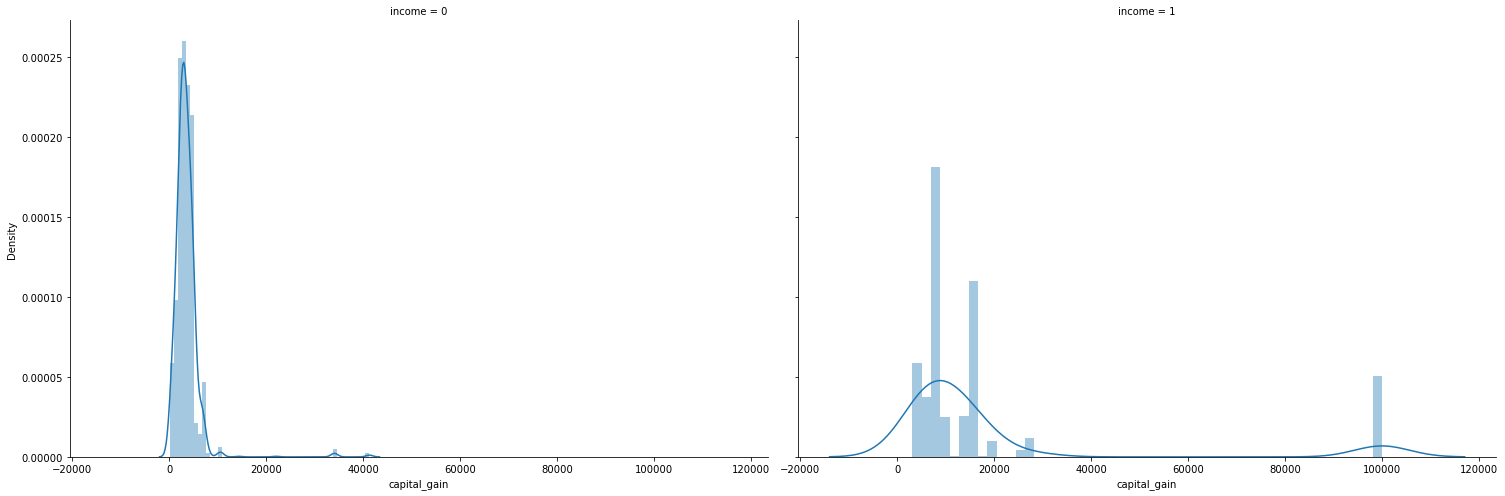

In [61]:
g = sns.FacetGrid(all_data.loc[all_data['capital_gain']> 0], col="income", height=7, aspect=1.5)# aspect 가로 ,height 세로, 
#income은 분리 요소.
g.map(sns.distplot, 'capital_gain')#x축

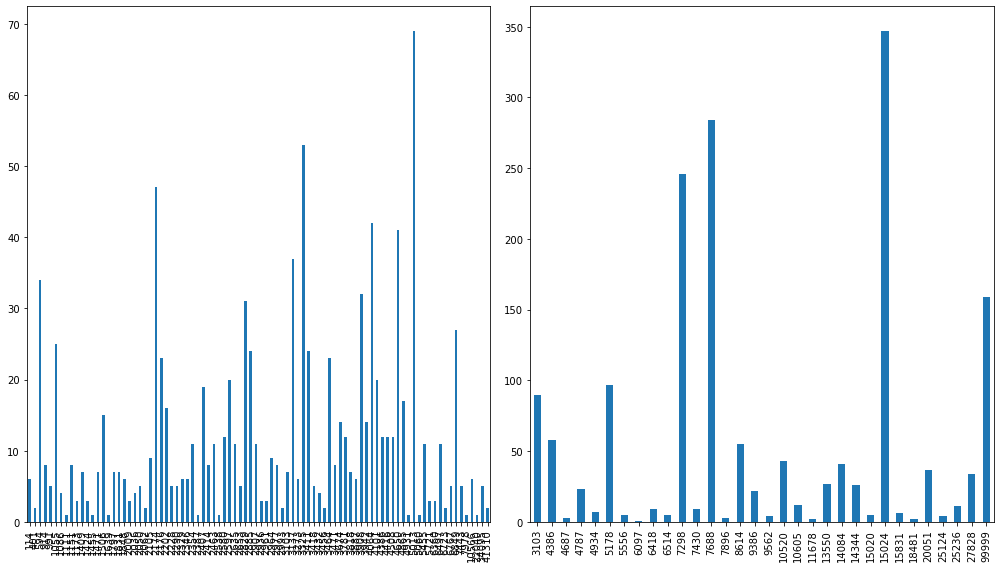

In [62]:
fig, axes = plt.subplots(1, 2,figsize=(14,8))
#메소드에 전달 된 인수는 각각 그림의 너비와 높이를 인치 단위로 나타낸다.

df1 = train.loc[(train['income'] == 0) & (train['capital_gain'] > 0), 'capital_gain'].value_counts().sort_index() #index로 정렬
df1.plot(kind='bar', ax=axes[0])

df1 = train.loc[(train['income'] == 1) & (train['capital_gain'] > 0), 'capital_gain'].value_counts().sort_index()
df1.plot(kind='bar', ax=axes[1])

plt.tight_layout()#자동으로 명시된 여백(padding)에 관련된 서브플롯 파라미터를 조정한다. 
plt.show()

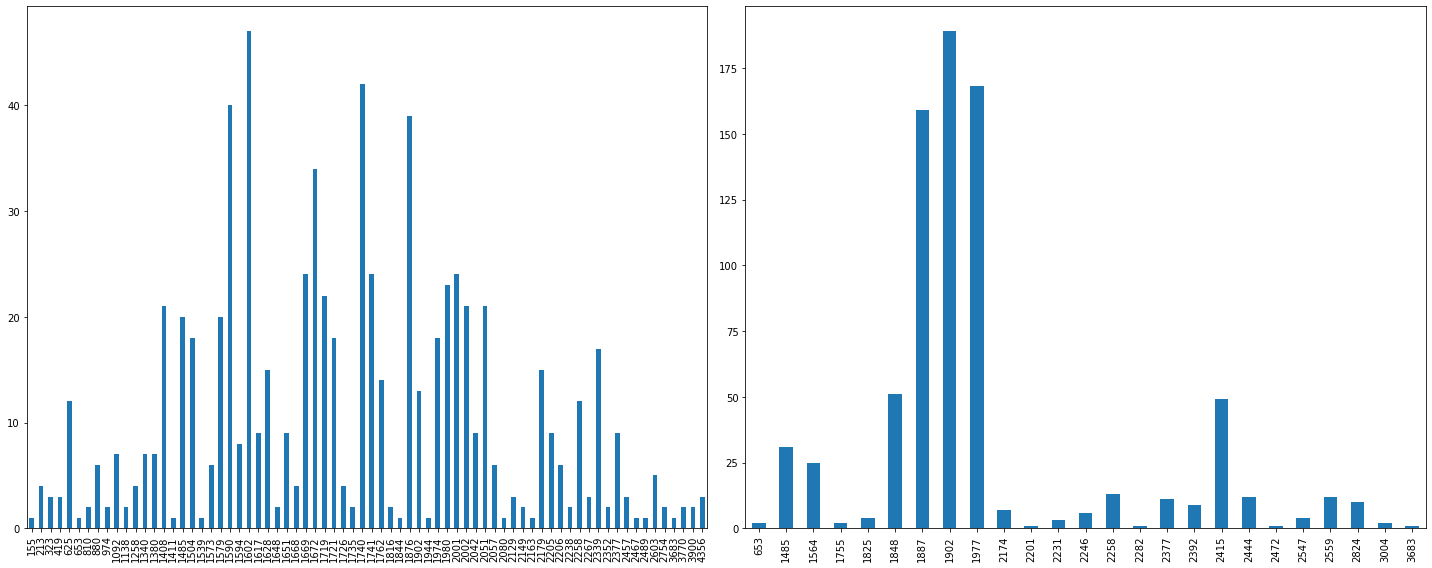

In [63]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 8)

df1 = train.loc[(train['income'] == 0) & (train['capital_loss'] > 0), 'capital_loss'].value_counts().sort_index()
df1.plot(kind='bar', ax=axes[0])

df1 = train.loc[(train['income'] == 1) & (train['capital_loss'] > 0), 'capital_loss'].value_counts().sort_index()
df1.plot(kind='bar', ax=axes[1])

plt.tight_layout()
plt.show()

capital_gain & capital_loss은 모두 Numerical 처럼 보이지만, categorical 로 만들어도 값의 variance가 크지 않습니다.

그래서 value_counts()로 income 별 값 분포를 확인합니다.

income == 1 인 그룹이 가지고 있는 특정 key와 income == 0 인 그룹이 가지고 있는 특정 key가 극명히 갈리는 것을 확인할 수 있습니다.

In [64]:
all_data['capital_net'] = all_data['capital_gain'] - all_data['capital_loss']
train['capital_net'] = train['capital_gain'] - train['capital_loss']
test['capital_net'] = test['capital_gain'] - test['capital_loss']

<AxesSubplot:xlabel='capital_net', ylabel='Density'>

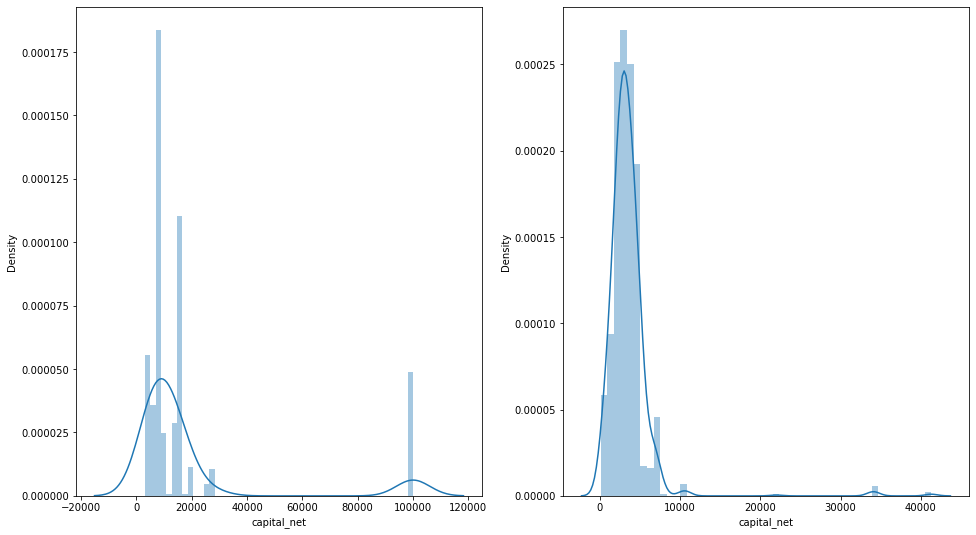

In [65]:
plt.figure(figsize=(16, 9))
plt.subplot(1, 2,1) #nrows=1, ncols=2, index=1 index는 순서를 의미함
sns.distplot(train.loc[ (train['capital_net'] > 0) & (train['income'] == 1), 'capital_net'])

plt.subplot(1, 2, 2)
sns.distplot(train.loc[ (train['capital_net'] > 0) & (train['income'] == 0), 'capital_net'])

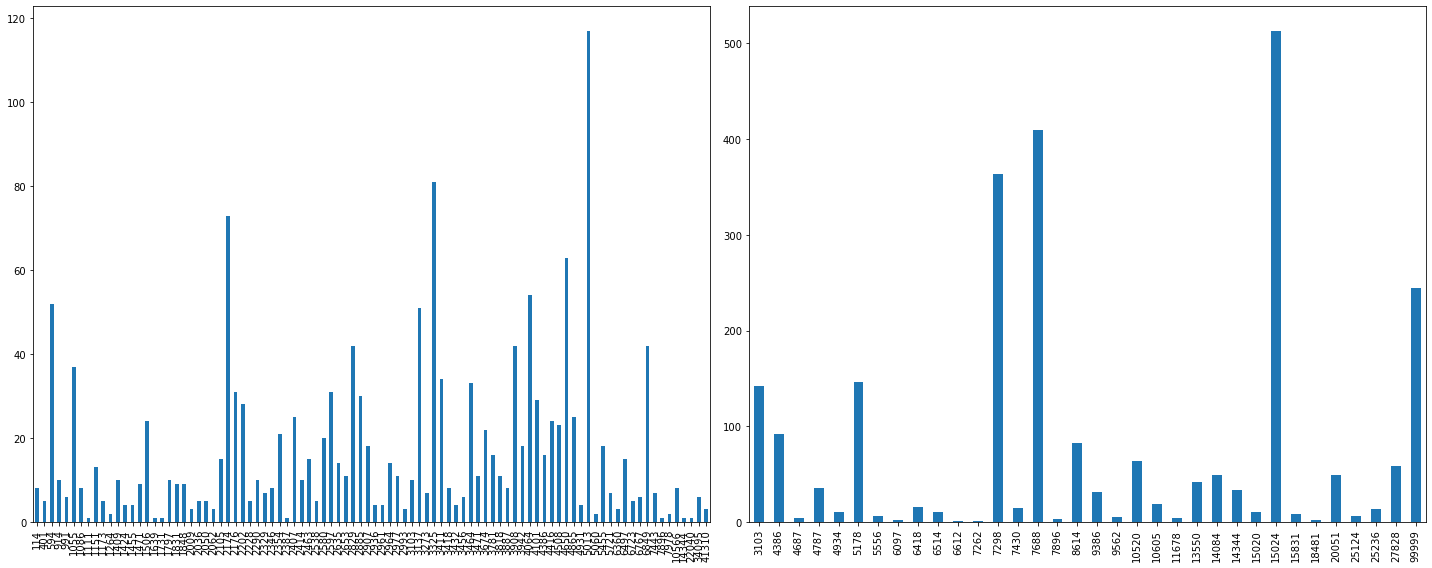

In [66]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 8)

df1 = all_data.loc[(all_data['income'] == 0) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index()
df1.plot(kind='bar', ax=axes[0])

df2 = all_data.loc[(all_data['income'] == 1) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index()
df2.plot(kind='bar', ax=axes[1])

plt.tight_layout()
plt.show()

In [67]:
pos_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
all_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
all_key.extend(all_data.loc[(all_data['income'] == 0) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist())
all_key[:5]#capital net 을 기준으로 income이 1이거나 0인 key값을 추출 

[3103, 4386, 4687, 4787, 4934]

<AxesSubplot:>

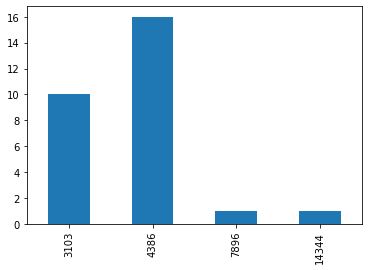

In [68]:
df1 = all_data.loc[(all_data['income'] == 0) & (all_data['capital_net'].isin(pos_key)), 'capital_net'].value_counts().sort_index()
df1.plot(kind='bar')

In [69]:
pos_key = all_data.loc[(all_data['income'] == 1) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
neg_key = all_data.loc[(all_data['income'] == 0) & (all_data['capital_net'] > 0), 'capital_net'].value_counts().sort_index().keys().tolist()
print(f'{pos_key[:5]},{neg_key[:5]}')

[3103, 4386, 4687, 4787, 4934],[114, 401, 594, 914, 991]


In [70]:
capital_net_pos_key = [key for key in pos_key if key not in neg_key]
capital_net_neg_key = [key for key in neg_key if key not in pos_key]
print(f'{capital_net_pos_key[:5]},{capital_net_neg_key[:5]}')

[4687, 4787, 4934, 5178, 5556],[114, 401, 594, 914, 991]


In [71]:
all_data['capital_net_pos_key'] = all_data['capital_net'].apply(lambda x: x in capital_net_pos_key)#apply는 함수 넣어줄때 사용 
all_data['capital_net_neg_key'] = all_data['capital_net'].apply(lambda x: x in capital_net_neg_key)
#겹치지 않는 키 추리기

In [72]:
all_data['hours_per_week'].value_counts().sort_values()

69        1
94        1
79        1
87        1
82        1
      ...  
35     1937
60     2177
45     2717
50     4246
40    22801
Name: hours_per_week, Length: 96, dtype: int64

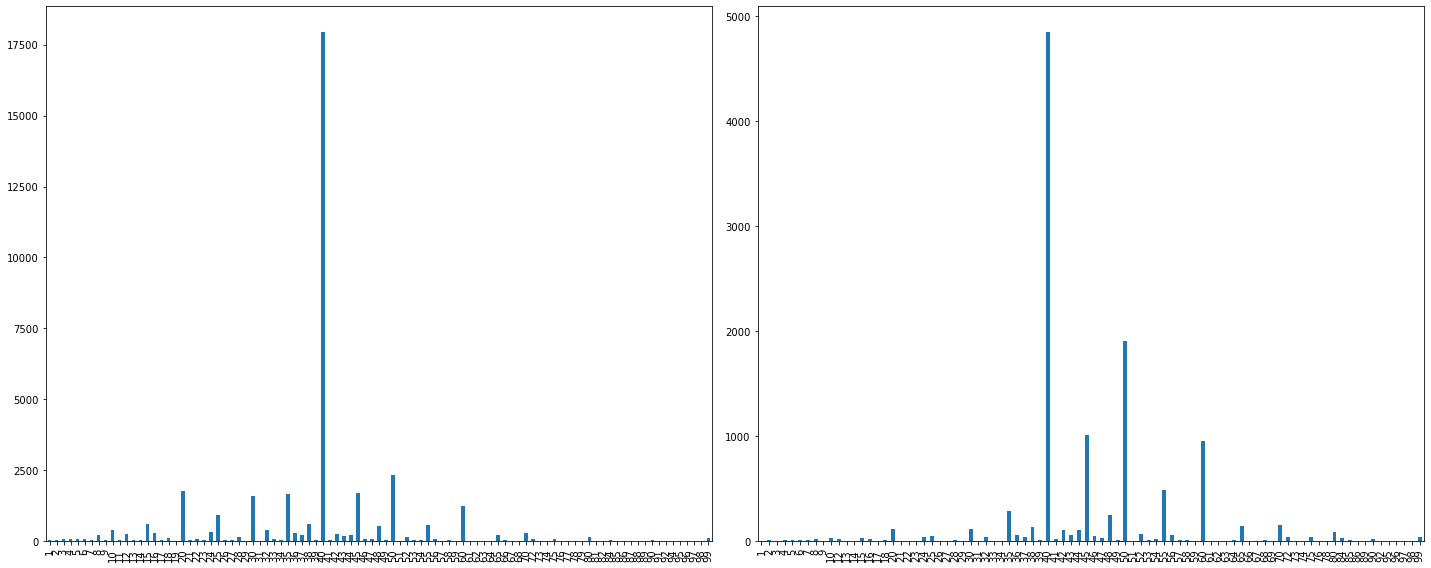

In [73]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(20, 8)

df1 = all_data.loc[(all_data['income'] == 0), 'hours_per_week'].value_counts().sort_index()
df1.plot(kind='bar', ax=axes[0])

df2 = all_data.loc[(all_data['income'] == 1), 'hours_per_week'].value_counts().sort_index()
df2.plot(kind='bar', ax=axes[1])

plt.tight_layout()
plt.show()

In [74]:
train['native_country'].value_counts().shape, test['native_country'].value_counts().shape

((42,), (41,))

In [75]:
all_data['native_country'].value_counts()

United-States                 43830
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [76]:
all_data.groupby('native_country')['income'].mean().reset_index().sort_values(by='income')# df가 이상하게 구성되어서 reset_index를 한듯?

,native_country,income
15,Holand-Netherlands,0.000000
13,Guatemala,0.034091
28,Outlying-US(Guam-USVI-etc),0.043478
4,Columbia,0.047059
6,Dominican-Republic,0.048544
26,Mexico,0.049422
27,Nicaragua,0.061224
8,El-Salvador,0.070968
38,Trinadad&Tobago,0.074074
40,Vietnam,0.081395


In [77]:
income_01 = ['Guatemala',
 'Outlying-US(Guam-USVI-etc)',
 'Columbia',
 'Dominican-Republic',
 'Thailand',
 'Mexico',
'Nicaragua',
 'El-Salvador',
'Trinadad&Tobago',
'Vietnam',
'Peru',
'Laos',] #1.0~1.5 언저리

income_02 = ['Honduras',
 'Puerto-Rico',
 'Haiti',
 'Ecuador',
 'Jamaica',
 'Scotland',
]

income_03 = ['Thailand',
 'Portugal',
 'South',
 'Poland',
            ]

income_04 = [
    'United-States',
]
income_05 = [
 'Cuba',
'Hong',
'Germany',
'Philippines',
'China',
'Ireland',
 'Holand-Netherlands',
]
income_06 = [
 'Hungary',
'Philippines',
 'Canada',
]
income_07 = [
 'Cambodia	',
 'Italy',
]

income_08 = [
 'Canada',
 'Yugoslavia',
 'Japan',
 'Greece',
 'England',
 'Iran',
]

income_09 = [
 'Taiwan',
 'India',
'France',
]

income_other=['?', ]

In [78]:
def convert_country(x):
    if x in income_01:
        return 'income_01'
    elif x in income_02:
        return 'income_02'
    elif x in income_03:
        return 'income_03'
    elif x in income_04:
        return 'income_04'
    elif x in income_05:
        return 'income_05'
    elif x in income_06:
        return 'income_06'
    elif x in income_07:
        return 'income_07'
    elif x in income_08:
        return 'income_08'
    elif x in income_09:
        return 'income_09'
    else:
        return 'income_other'

In [79]:
all_data['country_bin'] = all_data['native_country'].apply(convert_country)

In [80]:
all_data['country_bin'].value_counts()

income_04       43830
income_01        1666
income_other      885
income_05         829
income_02         451
income_08         350
income_03         269
income_09         254
income_06         201
income_07         105
Name: country_bin, dtype: int64

In [81]:
features = [
#     'id', 
    'age', 
    'workclass', 
#     'fnlwgt', 
    'fnlwgt_log', 
    'education', 
    'marital_status',
    'occupation',
    'relationship', 
    'race',
    'sex',
    'capital_gain',
    'capital_loss', 
    'hours_per_week',
    'native_country',
#     'income',
#     'capital_net', capital_gain과 corr이 커서 제거
    'capital_net_pos_key',
    'capital_net_neg_key',
    'country_bin',
]

In [82]:
label = [
    'income'
]

In [83]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48840 entries, 0 to 16279
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  48840 non-null  int64  
 1   workclass            48840 non-null  object 
 2   fnlwgt               48840 non-null  int64  
 3   education            48840 non-null  object 
 4   marital_status       48840 non-null  object 
 5   occupation           48840 non-null  object 
 6   relationship         48840 non-null  object 
 7   race                 48840 non-null  object 
 8   sex                  48840 non-null  object 
 9   capital_gain         48840 non-null  int64  
 10  capital_loss         48840 non-null  int64  
 11  hours_per_week       48840 non-null  int64  
 12  native_country       48840 non-null  object 
 13  income               48840 non-null  int64  
 14  fnlwgt_log           48840 non-null  float64
 15  capital_net          48840 non-null 

<AxesSubplot:>

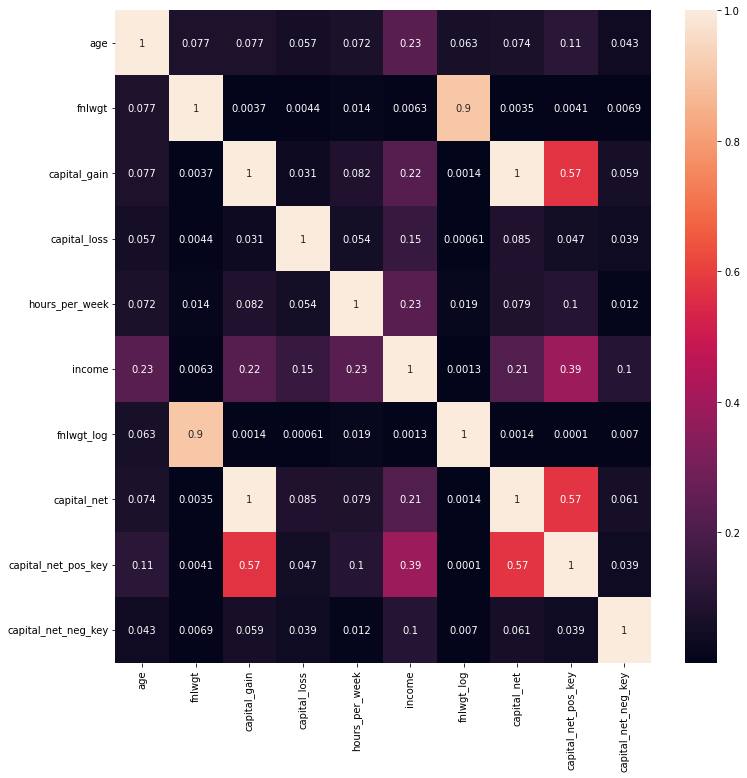

In [84]:
plt.figure(figsize=(12, 12))
sns.heatmap(abs(all_data.corr()), annot=True) #상관 계수를 절대치로 변경후 대입

In [85]:
all_data_dummies = pd.get_dummies(all_data[features + label]) #더미데이터로 만들기 , 수치형으로 
all_data_dummies.head()

,age,fnlwgt_log,capital_gain,capital_loss,hours_per_week,capital_net_pos_key,capital_net_neg_key,income,workclass_?,workclass_Federal-gov,...,country_bin_income_01,country_bin_income_02,country_bin_income_03,country_bin_income_04,country_bin_income_05,country_bin_income_06,country_bin_income_07,country_bin_income_08,country_bin_income_09,country_bin_income_other
0,50,11.330336,0,0,13,False,False,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,38,12.281393,0,0,40,False,False,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,53,12.366153,0,0,40,False,False,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,28,12.732011,0,0,40,False,False,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,37,12.558777,0,0,40,False,False,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [86]:
train_features = all_data_dummies.drop('income', 1).iloc[:len(train)]#income삭제 및 train 길이까지 인덱싱
test_features = all_data_dummies.drop('income', 1).iloc[len(train):]#프레인 길이부터 인덱싱 ->아까 합쳐가지고 나눠줘야

In [87]:
train_label = train[label]

In [88]:
train_features.shape, test_features.shape

((32560, 112), (16280, 112))

In [89]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
import lightgbm as lgbm

In [90]:
x_train, x_valid, y_train, y_valid = train_test_split(train_features, train_label, stratify=train_label, test_size=0.2, random_state=SEED)

In [91]:
NUM_BOOST_ROUND = 10000
N_SPLITS = 5

lgbm_param = {
    'objective': 'binary',#기본값: LGBMRegressor의 경우 'regression' 회귀 , LGBMClassifier의 경우 'binary' 이진분류
    #또는 'multiclass' 다중분류 , LGBMRanker의 경우 'lambdarank'입니다.
    'boosting_type':'gbdt',#gbdt', 전통적인 그래디언트 부스팅 결정 트리. 'dart', 탈락자가 다중 가법 회귀 트리를 만납니다
    'colsample_bytree':1.0,#각 트리를 구성할 때 열의 하위 샘플 비율입니다. default=1.0 
    'importance_type':'split',#채워질 기능 중요도 유형입니다 feature_importances_. '분할'인 경우 결과에는 모델에서 기능이 사용된 횟수가 포함됩니다. 
    #'이득'인 경우 결과에는 해당 기능을 사용하는 분할의 총 이득이 포함됩니다. default는 split
    'learning_rate':0.1,#  학습률을 높입니다. default=0.1
    'min_child_samples':20,# 자식(리프)에 필요한 최소 데이터 수. default=20 
    'min_child_weight':0.001,#자식(리프)에 필요한 인스턴스 가중치(Hessian)의 최소 합계. default=0.001 
    'min_split_gain':0,#트리의 리프 노드에서 추가 파티션을 만드는 데 필요한 최소 손실 감소. default=0 
    'n_estimators':10000,# 맞출 부스트 트리의 수.default=100
    'num_leaves':40,# 본 학습자를 위한 최대 트리 리프. default= 31
    'random_state':SEED,
    'early_stopping_rounds': 200,#최적의 학습이후 콜백 
    'reg_alpha':0.6,#가중치에 대한 L1 정규화 용어. default 0
    'reg_lambda':0.5,#가중치에 대한 L2 정규화 용어. default 0
    'subsample':1.0, #훈련 인스턴스의 subsample 비율. default=1.0
    'subsample_for_bin':200000, #bin 구성을 위한 샘플 수. default 20000
    'subsample_freq':0, #  subsample의 빈도, <=0은 활성화가 없음을 의미합니다. default=0 
    'n_jobs':-1, #속도 향상 
}

In [92]:
dtrain = lgbm.Dataset(x_train, y_train)
dvalid = lgbm.Dataset(x_valid, y_valid)

In [93]:
model = lgbm.train(lgbm_param, dtrain, NUM_BOOST_ROUND, #파라미터, 데이터셋, 부스팅 반복 횟수.
                   valid_sets=(dtrain, dvalid),  #훈련 중에 평가할 데이터 목록.
                   valid_names=('train', 'valid'), 
                   verbose_eval=100, #몇번쨰 마다 메세지를 출력할것인지
                  )

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Number of positive: 6273, number of negative: 19775
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 98
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240825 -> initscore=-1.148164
[LightGBM] [Info] Start training from score -1.148164
Training until validation scores don't improve for 200 rounds
[100]	train's binary_logloss: 0.233877	valid's binary_logloss: 0.279218
[200]	train's binary_logloss: 0.207827	valid's binary_logloss: 0.284072
Early stopping, best iteration is:
[97]	train's binary_logloss: 0.2

In [94]:
threshold = 0.5
valid_prediction = model.predict(x_valid) #이진분류나 회귀는 길이가 n인 벡터를 반환  이건 classifier가아닌 train으로 모델자체를 학습하면 사이킷런과 달리 확률값이 도출된다. 따라서 밑에서 threshold로 0.5를 기준으로 판단하는 것을 설정해준다.
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4944
           1       0.77      0.67      0.72      1568

    accuracy                           0.87      6512
   macro avg       0.83      0.80      0.82      6512
weighted avg       0.87      0.87      0.87      6512



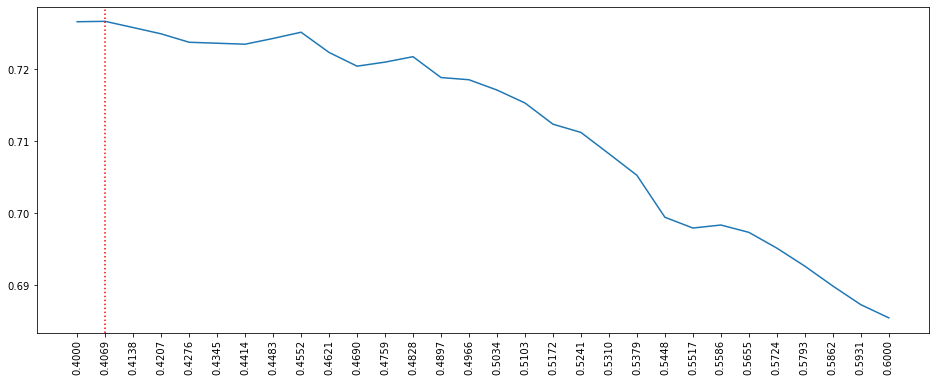

In [95]:
f1_threshold = np.linspace(0.4, 0.6, 30)# 시작,끝,간격 1차원배열만들기
f1_scores = []
max_score = 0
max_threshold = 0

for t in f1_threshold:
    valid_prediction = model.predict(x_valid)
    valid_prediction[valid_prediction > t] = 1
    valid_prediction[valid_prediction <= t] = 0
    score_ = f1_score(y_valid, valid_prediction)
    f1_scores.append(score_)
    if score_ > max_score:
        max_score = score_
        max_threshold = t
        
plt.figure(figsize=(16, 6))
plt.plot(f1_threshold, f1_scores) #x값 y값
plt.axvline(x=max_threshold, linestyle=':', color='r') #수직선을 긋는다. 수평선은 axhline임 
plt.xticks(f1_threshold, rotation=90)
plt.show()

<AxesSubplot:>

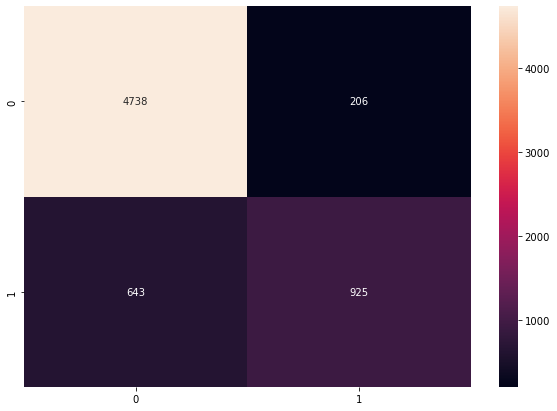

In [102]:
plt.figure(figsize=FIG_SIZE)
sns.heatmap(confusion_matrix(y_valid, valid_prediction), annot=True, fmt='g')

In [99]:
pred = model.predict(test_features)
print(pred)

[0.20333196 0.40750135 0.9989493  ... 0.79517026 0.0021103  0.70151236]


<AxesSubplot:ylabel='Density'>

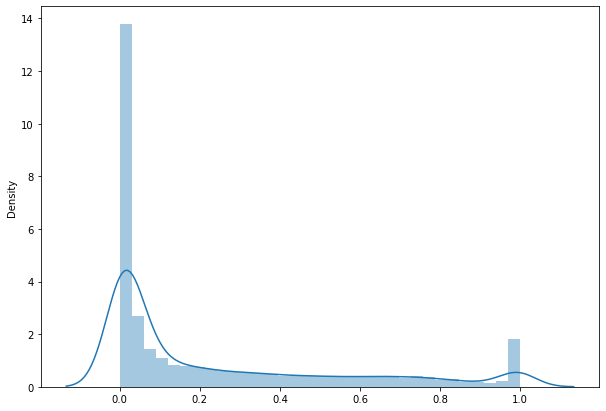

In [100]:
plt.figure(figsize=FIG_SIZE) #pred의 분포 확인
sns.distplot(pred)

In [103]:
THRESHOLD = 0.5

print(len(pred[pred >= THRESHOLD]) / len(pred[pred < THRESHOLD]))#0.5보다 낮은 확률이 더많다.

0.2586006957866254


In [104]:
pred[pred >= THRESHOLD] = 1
pred[pred < THRESHOLD] = 0 #이진으로 만들기 
print(pred)

[0. 0. 1. ... 1. 0. 1.]


In [105]:
income_pct = train['income'].value_counts()[1] / train['income'].value_counts()[0]#위의 값과 비교하기위해서 실질값 가져오기
income_pct

0.3172053885674987

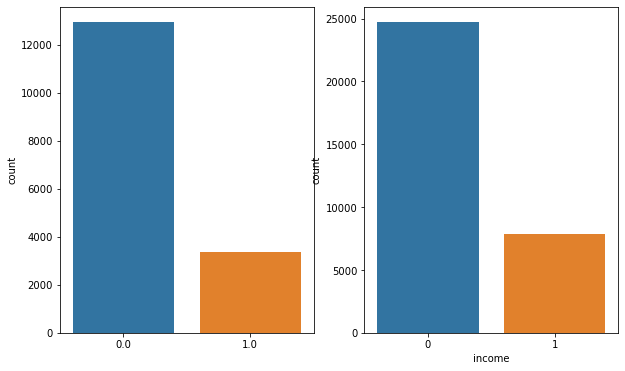

In [111]:
plt.figure(figsize=(10, 6))
plt.subplot(121)#if nrows = 1, ncols = 2, index = 1 -> 121 
sns.countplot(pred)

plt.subplot(122)
sns.countplot(train['income'])
plt.show()#그래프 형태는 거의 비슷하다.

In [112]:
!pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\2469l\anaconda3\python.exe' 'C:\Users\2469l\AppData\Local\Temp\pip-standalone-pip-j3h3w2io\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\2469l\AppData\Local\Temp\pip-build-env-b7m1v9sq\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- setuptools wheel 'Cython>=0.28.5' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation == '"'"'CPython'"'"'' 'numpy==1.14.0; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"' and platform_python_implementation != '"'"'CPython'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and pl

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68734 sha256=3fe5ce68e5b809481074bdde2da7e751a5f3f5ab027b3edd5ef0bde179774dc9
  Stored in directory: c:\users\2469l\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ab066cab982dfdb88d4165be0df6d938e5a896b7c3e8a081815d8a1f21170249
  Stored in directory: c:\users\2469l\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=c7b0f67892795bb4cabc67bd6a674985fc16c2f50d003011b5201de5b1a5ff3a
  Stored in directory: c:\users\2469l\appdata\local\pip\cache\wheels\51\f9\a5\740af2fdb0ad1edf79aabdc41531be0b6f0b2e2be684c388cf
  Created wheel for databricks-cli: filename=databricks_cli-0.16.6-py3-none-any.whl size=112631 sha256=e31686da947ad320b18c000aa02470a5cbaf458

In [113]:
features, label

(['age',
  'workclass',
  'fnlwgt_log',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'capital_gain',
  'capital_loss',
  'hours_per_week',
  'native_country',
  'capital_net_pos_key',
  'capital_net_neg_key',
  'country_bin'],
 ['income'])

In [114]:
all_data_caret = all_data[features + label]

In [115]:
all_data_caret.head()

,age,workclass,fnlwgt_log,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,capital_net_pos_key,capital_net_neg_key,country_bin,income
0,50,Self-emp-not-inc,11.330336,level_7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False,False,income_04,0
1,38,Private,12.281393,level_4,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False,False,income_04,0
2,53,Private,12.366153,level_3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False,False,income_04,0
3,28,Private,12.732011,level_7,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False,False,income_05,0
4,37,Private,12.558777,level_8,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False,False,income_04,0


In [116]:
all_data_caret['age'] = all_data_caret['age'].astype('float')
# all_data_caret['capital_net'] = all_data_caret['capital_net'].astype('float')
all_data_caret['hours_per_week'] = all_data_caret['hours_per_week'].astype('float')
all_data_caret['capital_gain'] = all_data_caret['capital_gain'].astype('float')
all_data_caret['capital_loss'] = all_data_caret['capital_loss'].astype('float') #type casting 

In [117]:
train_clean = all_data_caret[:len(train)]
test_clean = all_data_caret[len(train):]

In [118]:
train_clean['income'] = train_clean['income'].astype('int')

In [119]:
train_clean.head()

,age,workclass,fnlwgt_log,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,capital_net_pos_key,capital_net_neg_key,country_bin,income
0,50.0,Self-emp-not-inc,11.330336,level_7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,False,False,income_04,0
1,38.0,Private,12.281393,level_4,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,False,False,income_04,0
2,53.0,Private,12.366153,level_3,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,False,False,income_04,0
3,28.0,Private,12.732011,level_7,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,False,False,income_05,0
4,37.0,Private,12.558777,level_8,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,False,False,income_04,0


In [121]:
setup(data = train_clean, target = 'income', session_id=SEED, silent=True)# data는 train셋 target pycaret 사용은 일단 보류

NameError: name 'setup' is not defined